## **Importing libraries**

***NLTK*** :natural language processing

  *SnowballStemmer*, a stemming algorithm in NLTK used to reduce words to their
   root or base form.

***Scikit-learn*** : (sklearn) is a machine learning library for Python.

  *TfidfVectorizer* is a class in the sklearn used for converting a collection of raw documents into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features.

In [15]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import pandas as pd
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## **Importing the dataset**



The dataset consists of 2 columns - text and label.

text - The news articles.

label - Whether each article is classified as real or fake

In [16]:
print('Importing the data set')
data = pd.read_csv("Training.csv")
data.head()

Importing the data set


,Text,label
0,"((In March 30 item, corrects spelling of Kisl...",Real
1,((Refiles December 15 story to clarify areas ...,Real
2,((This Dec. 5 story corrects year in 2nd para...,Real
3,((This Dec. 9 story corrects year in 2nd para...,Real
4,((This December 4 story has been corrected to...,Real


**Labeling the label attribute**

Select the column named 'label' from the Dataset and map the values 'Real' to 1 and 'Fake' to 0. This converts categorical labels into numerical values.

In [17]:
data['label'] = data['label'].map({'Real': 1, 'Fake': 0})
data.head()

,Text,label
0,"((In March 30 item, corrects spelling of Kisl...",1
1,((Refiles December 15 story to clarify areas ...,1
2,((This Dec. 5 story corrects year in 2nd para...,1
3,((This Dec. 9 story corrects year in 2nd para...,1
4,((This December 4 story has been corrected to...,1


## **Data Preprocessing**

**Tokenizing the data**


This tokenizes the text data in the 'Text' column of the DataFrame.

In [18]:
print('Tokenizing')
data['Text']=data['Text'].apply(word_tokenize)
print()
print("Tokenized successfully.")

Tokenizing

Tokenized successfully.


**Stemming the data**

**What is STEMMING ?**

*Stemming is the process of reducing words to their root or base form, stripping away prefixes, suffixes, and inflections. It helps in simplifying words to their common form, which can aid in tasks like text analysis and natural language processing.*

*SnowballStemmer is a stemming algorithm available in NLTK. It is designed to support multiple languages and provides accurate stemming. It follows a set of rules and algorithms specific to each language to perform stemming effectively.*

This code snippet initializes a SnowballStemmer for English and then defines a function stem_it to apply stemming to each token in the text. Finally, it applies this function to the 'Text' column of the DataFrame, replacing the tokenized text with the stemmed tokens.

In [19]:
print('Stemming')
porter=SnowballStemmer("english",ignore_stopwords=False)
def stem_it(text):
    return [porter.stem(word) for word in text]
data['Text']=data['Text'].apply(stem_it)
print()
print("Stemmed successfully.")

Stemming

Stemmed successfully.


**Removing stopword**


This code snippet removes stopwords from the text data and filters out words with a length of less than or equal to 2 characters. Finally, it rejoins the remaining words into a single string.

In [20]:
print('Stopword Removal')
def stop_it(t):
    dt=[word for word in t if len(word)>2]
    return dt
data['Text']=data['Text'].apply(stop_it)
data['Text']=data['Text'].apply(' '.join)
print()
print("Stop words removed successfully.")

Stopword Removal

Stop words removed successfully.


## **Train Test Split**

**Splitting the dataset into train and test samples**

In [21]:
print('Splitting dataset')
X_train,X_test,y_train,y_test = train_test_split(data['Text'],data['label'],test_size=0.25)

Splitting dataset


## **Vectorization**

**Vectorizing the Natural Language using TF-IDF Vectorizer**

*TF-IDF Vectorizer converts text data into numerical vectors based on the importance of words in documents.*

This code segment performs TF-IDF vectorization on the training and test text data.

In [22]:
print('Vectorization (TF-IDF)')
my_tfidf = TfidfVectorizer(max_df=0.7)

tfidf_train = my_tfidf.fit_transform(X_train)
tfidf_test = my_tfidf.transform(X_test)


Vectorization (TF-IDF)


## **Training Models**

**Logistic Regression** : *A statistical method used for binary classification, predicting the probability of an event occurring based on one or more predictor variables. It models the relationship between the categorical dependent variable and independent variables by estimating probabilities using the logistic function.*


This code snipper applies the Logistic Regression with 900 iterations on TF-IDF transformed data to predict the authenticity of news articles, calculating and printing the accuracy of its predictions.

In [27]:
print('Logistic Regression')
model_1 = LogisticRegression(max_iter = 900)
model_1.fit(tfidf_train, y_train)
pred_1 = model_1.predict(tfidf_test)
cr1 = accuracy_score(y_test,pred_1)

print('The accuracy of prediction in Logistic Regression Model is ', round(cr1 * 100, 3))

Logistic Regression
The accuracy of prediction in Logistic Regression Model is  98.996


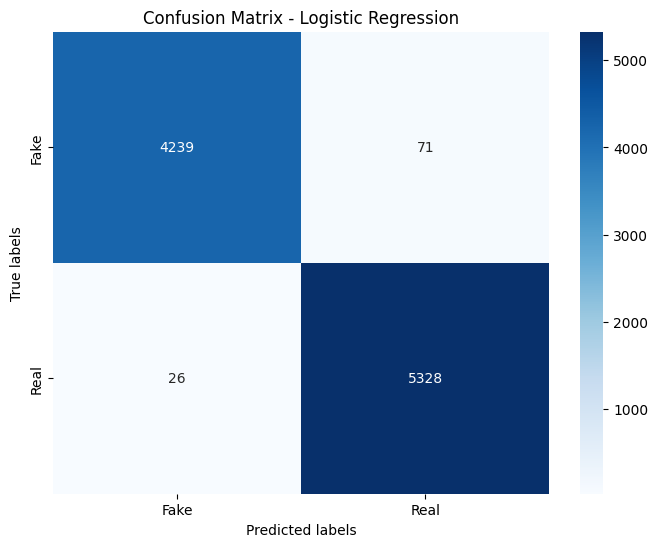

In [28]:
cm_lr = confusion_matrix(y_test, pred_1)

# Define class labels
labels = ['Fake', 'Real']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

**Passive Aggressive Classifier** : *The Passive Aggressive Classifier is an online learning algorithm for binary classification.  It updates its model iteratively, allowing it to adapt to changes in the data distribution over time, making it particularly useful for real-time applications where continuous learning is necessary.*


This code snippet applies the Passive Aggressive Classifier with 50 iterations on TF-IDF transformed data to predict the authenticity of news articles, calculating and printing the accuracy of its predictions.


In [29]:
print('Passive Aggressive Classifier')
model = PassiveAggressiveClassifier(max_iter=50)
model.fit(tfidf_train,y_train)

y_pred = model.predict(tfidf_test)
cr2 = accuracy_score(y_test,y_pred)

print('The accuracy of prediction in Passive Aggressive Model is ', round(cr2 * 100, 3))

Passive Aggressive Classifier
The accuracy of prediction in Passive Aggressive Model is  99.679


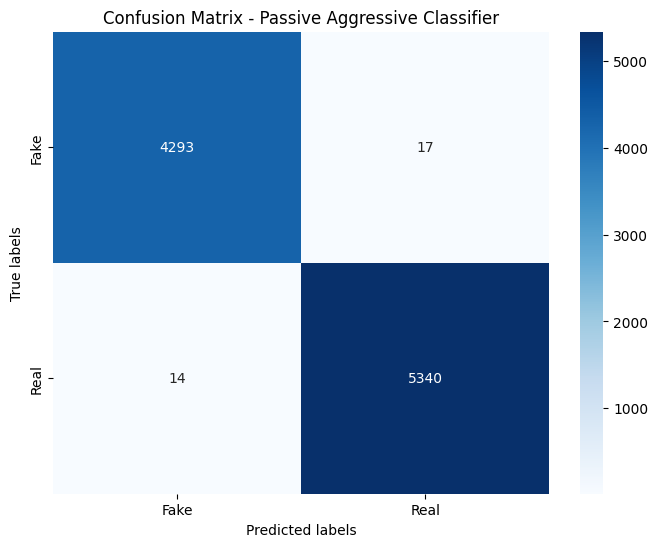

In [30]:
cm_pa = confusion_matrix(y_test, y_pred)

# Define class labels
labels = ['Fake', 'Real']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pa, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Passive Aggressive Classifier')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()